In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
from scipy.special import softmax 
from scipy.stats import ttest_rel
import pandas as pd 

In [12]:
#timeseries=np.concatenate([np.load('data/black/bert-base-uncased/syntactic_analyses/black_bert-base-uncased_zrep_magnitudes.npy'),np.load('data/slumlordreach/bert-base-uncased/syntactic_analyses/slumlordreach_bert-base-uncased_zrep_magnitudes.npy')],axis=0)
timeseries=np.load('data/black/bert-base-uncased/syntactic_analyses/black_bert-base-uncased_zrep_magnitudes.npy').T
timeseries.shape 

(144, 534)

In [7]:
brain_weights=np.load('head2brainweights_black.npy')
brain_weights.shape 

(144, 1000)

In [14]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
cluster_scores=np.zeros((20,))
for n_cluster in range(2,20):
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit(timeseries)
    cluster_scores[n_cluster]=silhouette_score(timeseries,kmeans.labels_)

2

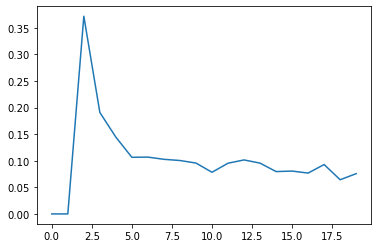

In [16]:
plt.plot(list(range(20)),cluster_scores)
np.argmax(cluster_scores)

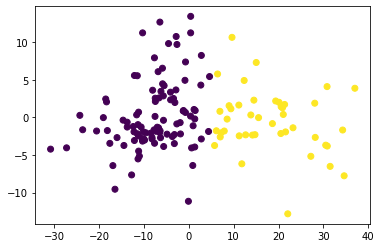

In [31]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
ts_pca=pca.fit_transform(timeseries)
kmeans=KMeans(n_clusters=2)
kmeans.fit(timeseries)
plt.scatter(ts_pca[:,0],ts_pca[:,1],c=kmeans.labels_)

In [34]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
cluster_scores=np.zeros((20,))
for n_cluster in range(2,20):
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit(brain_weights)
    cluster_scores[n_cluster]=silhouette_score(brain_weights,kmeans.labels_)

2

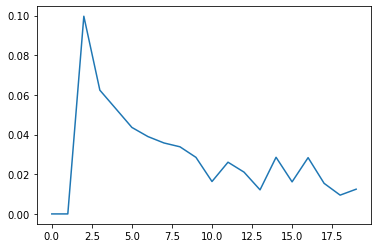

In [35]:
plt.plot(list(range(20)),cluster_scores)
np.argmax(cluster_scores)

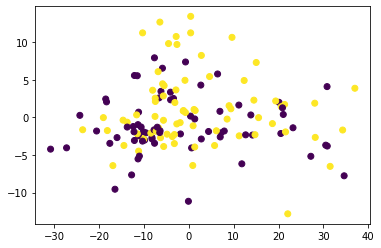

In [42]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
ts_pca=pca.fit_transform(timeseries)
kmeans=KMeans(n_clusters=2)
kmeans.fit(brain_weights)
plt.scatter(ts_pca[:,0],ts_pca[:,1],c=kmeans.labels_)